<a href="https://colab.research.google.com/github/aisamuel/keras/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q keras

In [0]:
from keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [69]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.5180 - acc: 0.7999 - val_loss: 0.3964 - val_acc: 0.8657
Epoch 2/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.3165 - acc: 0.8999 - val_loss: 0.3183 - val_acc: 0.8827
Epoch 3/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.2341 - acc: 0.9236 - val_loss: 0.2823 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1841 - acc: 0.9409 - val_loss: 0.2801 - val_acc: 0.8880
Epoch 5/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1494 - acc: 0.9527 - val_loss: 0.3575 - val_acc: 0.8570
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1242 - acc: 0.9614 - val_loss: 0.2853 - val_acc: 0.8870
Epoch 7/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1027 - acc: 0.9703 - val_loss: 0.3041 - val_acc

In [70]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

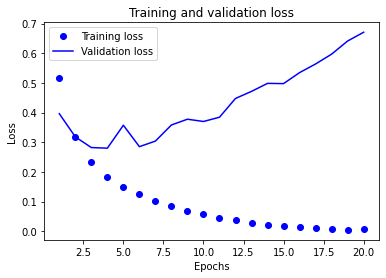

In [71]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history.history['acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

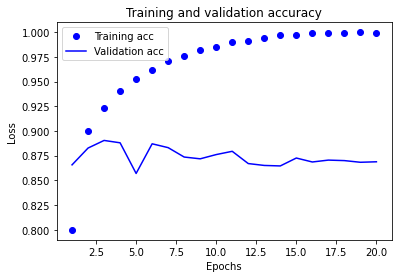

In [72]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [73]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 91us/step


In [74]:
results

[0.7243528105950355, 0.8533599972724915]

In [75]:
model.predict(x_test)

array([[0.00610176],
       [1.        ],
       [0.95098335],
       ...,
       [0.00316485],
       [0.0048713 ],
       [0.7452395 ]], dtype=float32)

In [76]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [79]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.4981 - accuracy: 0.8196
Epoch 2/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.2876 - accuracy: 0.9043
Epoch 3/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.2156 - accuracy: 0.9242
Epoch 4/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.1788 - accuracy: 0.9370


In [80]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 92us/step


In [81]:
results

[0.28483778665542603, 0.8878399729728699]

In [82]:
model.predict(x_test)

array([[0.21588315],
       [0.999874  ],
       [0.91922736],
       ...,
       [0.13064617],
       [0.10665707],
       [0.6518805 ]], dtype=float32)

In [60]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [63]:
model.predict(x_test[:10])

array([[5.5306493e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9991226e-01],
       [9.9990225e-01],
       [9.9963272e-01],
       [1.0000000e+00],
       [6.9670096e-09],
       [9.9998844e-01],
       [1.0000000e+00]], dtype=float32)

In [64]:
y_test[:10]

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 1.], dtype=float32)

AttributeError: ignored